<a href="https://colab.research.google.com/github/sangameshwar14/Home-work/blob/main/FINAL%20PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTRODUCTION :**

The main goal of this project is to explore the connections, between healthcare access and the prevalence of diseases in different counties across Missouri. By examining datasets that include information on demographics, healthcare factors and lifestyle indicators the aim is to identify patterns and correlations that can help us understand the disparities in health within the region. The datasets collected from sources provide data on obesity diabetes, smoking habits and lack of insurance, among older adults. All crucial factors that can impact the overall health of a community. Through cleaning, analysis and visualization of the data my analysis aims to create an understanding of the health landscape. This knowledge could potentially assist policymakers and healthcare providers in developing strategies to improve health.


# **Datasets Utilized**
1. **demographic data of missouri state.xlsx:** Provides demographic breakdowns that are key to understanding population health needs.

2. **leading causes of death.csv:** Contains vital statistics on mortality, which can highlight prevalent health issues.

3. **risk factors and access to care.xlsx:** Offers insights into lifestyle factors and healthcare accessibility, which are instrumental in preventive health strategies.

4. **preventive services use:** Data from AWS on the use of preventive services, crucial for evaluating public health interventions.

access link : https://www.kaggle.com/datasets/thedevastator/demographic-trends-and-health-outcomes-in-the-u?select=PREVENTIVESERVICESUSE.csv

**Methodology**

My methodology encompasses a range of analytical techniques including data merging for a comprehensive dataset, transformation to normalize and prepare data for analysis, and advanced aggregation methods to distill insights at various levels.  

**Expected Outcomes**

By the conclusion of this analysis, *i* anticipate revealing critical correlations between healthcare access and disease prevalence, thereby informing targeted public health interventions. This project, while theoretical, has the potential to lay the groundwork for future research and policy-making aimed at bridging the gaps in healthcare equity

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Data Loading and Initial Exploration**
#DATASET 1:
This dataset provides information on the leading causes of death. This data is crucial as it will form the foundation of our health analysis, giving us insight into mortality trends that may correlate with factors like healthcare access and chronic disease prevalence

In [ ]:
## Load the dataset on leading causes of death
leading_deathcause = pd.read_csv("LEADINGCAUSESOFDEATH.csv")
leading_deathcause

,index,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Strata_ID_Number,A_Wh_Comp,CI_Min_A_Wh_Comp,CI_Max_A_Wh_Comp,...,F_Bl_Cancer,CI_Min_F_Bl_Cancer,CI_Max_F_Bl_Cancer,F_Ot_Cancer,CI_Min_F_Ot_Cancer,CI_Max_F_Ot_Cancer,F_Hi_Cancer,CI_Min_F_Hi_Cancer,CI_Max_F_Hi_Cancer,LCD_Time_Span
0,0,1,1,Autauga,Alabama,AL,29,-1111,-1111,-1111,...,19,14,23,-1111,-1111,-1111,-1111,-1111,-1111,1999-2003
1,1,1,3,Baldwin,Alabama,AL,16,57,39,75,...,20,15,25,-1111,-1111,-1111,-1111,-1111,-1111,2001-2003
2,2,1,5,Barbour,Alabama,AL,51,-1111,-1111,-1111,...,26,22,31,-1111,-1111,-1111,-1111,-1111,-1111,1999-2003
3,3,1,7,Bibb,Alabama,AL,42,-1111,-1111,-1111,...,20,14,25,-1111,-1111,-1111,-1111,-1111,-1111,1994-2003
4,4,1,9,Blount,Alabama,AL,28,34,17,52,...,28,10,46,-1111,-1111,-1111,-1111,-1111,-1111,1999-2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,3136,56,37,Sweetwater,Wyoming,WY,77,46,28,65,...,-1111,-1111,-1111,-1111,-1111,-1111,11,-2222,-2222,1999-2003
3137,3137,56,39,Teton,Wyoming,WY,78,-1111,-1111,-1111,...,-1111,-1111,-1111,-1111,-1111,-1111,-1111,-1111,-1111,1994-2003
3138,3138,56,41,Uinta,Wyoming,WY,38,50,30,70,...,-1111,-1111,-1111,-1111,-1111,-1111,-1111,-1111,-1111,1994-2003
3139,3139,56,43,Washakie,Wyoming,WY,82,-1111,-1111,-1111,...,-1111,-1111,-1111,-1111,-1111,-1111,-1111,-1111,-1111,1994-2003


In [ ]:
# Display the first few rows to understand the data's structure
leading_deathcause.head()

,index,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Strata_ID_Number,A_Wh_Comp,CI_Min_A_Wh_Comp,CI_Max_A_Wh_Comp,...,F_Bl_Cancer,CI_Min_F_Bl_Cancer,CI_Max_F_Bl_Cancer,F_Ot_Cancer,CI_Min_F_Ot_Cancer,CI_Max_F_Ot_Cancer,F_Hi_Cancer,CI_Min_F_Hi_Cancer,CI_Max_F_Hi_Cancer,LCD_Time_Span
0,0,1,1,Autauga,Alabama,AL,29,-1111,-1111,-1111,...,19,14,23,-1111,-1111,-1111,-1111,-1111,-1111,1999-2003
1,1,1,3,Baldwin,Alabama,AL,16,57,39,75,...,20,15,25,-1111,-1111,-1111,-1111,-1111,-1111,2001-2003
2,2,1,5,Barbour,Alabama,AL,51,-1111,-1111,-1111,...,26,22,31,-1111,-1111,-1111,-1111,-1111,-1111,1999-2003
3,3,1,7,Bibb,Alabama,AL,42,-1111,-1111,-1111,...,20,14,25,-1111,-1111,-1111,-1111,-1111,-1111,1994-2003
4,4,1,9,Blount,Alabama,AL,28,34,17,52,...,28,10,46,-1111,-1111,-1111,-1111,-1111,-1111,1999-2003


Replacing Sentinel Values with NaN: Sentinel values (like -1111 and -2222) indicate missing or unknown data. I replaced these with NaN to accurately reflect missing data.

In [ ]:
# Replace -1111 and -2222 with NaN
leading_deathcause.replace([-1111, -2222], np.nan, inplace=True)


Removing Sparse Columns: Columns with a high percentage of missing values may not provide valuable information and can distort our analysis. I removed any column where more than 50% of the data is missing.


In [ ]:
# Drop columns with more than a certain percentage of missing values
threshold = 0.5  # Example threshold
leading_deathcause.dropna(axis=1, thresh=int(threshold * len(leading_deathcause)), inplace=True)

# Drop rows with missing values
leading_deathcause.dropna(inplace=True)


In [ ]:
leading_deathcause

,index,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Strata_ID_Number,C_Wh_Injury,CI_Min_C_Wh_Injury,CI_Max_C_Wh_Injury,...,E_Wh_HeartDis,CI_Min_E_Wh_HeartDis,CI_Max_E_Wh_HeartDis,F_Wh_HeartDis,CI_Min_F_Wh_HeartDis,CI_Max_F_Wh_HeartDis,F_Wh_Cancer,CI_Min_F_Wh_Cancer,CI_Max_F_Wh_Cancer,LCD_Time_Span
1,1,1,3,Baldwin,Alabama,AL,16,63.0,50.0,75.0,...,22.0,19.0,25.0,30.0,29.0,32.0,23.0,22.0,25.0,2001-2003
3,3,1,7,Bibb,Alabama,AL,42,63.0,48.0,78.0,...,23.0,19.0,28.0,31.0,28.0,34.0,18.0,16.0,20.0,1994-2003
4,4,1,9,Blount,Alabama,AL,28,64.0,49.0,79.0,...,23.0,19.0,27.0,34.0,32.0,36.0,20.0,19.0,22.0,1999-2003
9,9,1,19,Cherokee,Alabama,AL,64,68.0,52.0,83.0,...,32.0,27.0,36.0,34.0,32.0,36.0,21.0,19.0,23.0,1994-2003
10,10,1,21,Chilton,Alabama,AL,32,80.0,66.0,94.0,...,28.0,24.0,33.0,34.0,32.0,37.0,18.0,16.0,20.0,1999-2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3114,3114,55,135,Waupaca,Wisconsin,WI,18,59.0,42.0,75.0,...,25.0,20.0,29.0,31.0,29.0,33.0,19.0,18.0,21.0,1999-2003
3116,3116,55,139,Winnebago,Wisconsin,WI,11,55.0,40.0,69.0,...,20.0,16.0,23.0,28.0,27.0,30.0,21.0,20.0,23.0,2001-2003
3117,3117,55,141,Wood,Wisconsin,WI,45,63.0,46.0,79.0,...,22.0,18.0,26.0,29.0,27.0,31.0,21.0,20.0,23.0,1999-2003
3120,3120,56,5,Campbell,Wyoming,WY,47,62.0,45.0,78.0,...,24.0,18.0,30.0,23.0,19.0,27.0,21.0,18.0,25.0,1999-2003


In [ ]:
# Displaying the first few rows to verify the changes
leading_deathcause.head()

,index,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Strata_ID_Number,C_Wh_Injury,CI_Min_C_Wh_Injury,CI_Max_C_Wh_Injury,...,E_Wh_HeartDis,CI_Min_E_Wh_HeartDis,CI_Max_E_Wh_HeartDis,F_Wh_HeartDis,CI_Min_F_Wh_HeartDis,CI_Max_F_Wh_HeartDis,F_Wh_Cancer,CI_Min_F_Wh_Cancer,CI_Max_F_Wh_Cancer,LCD_Time_Span
1,1,1,3,Baldwin,Alabama,AL,16,63.0,50.0,75.0,...,22.0,19.0,25.0,30.0,29.0,32.0,23.0,22.0,25.0,2001-2003
3,3,1,7,Bibb,Alabama,AL,42,63.0,48.0,78.0,...,23.0,19.0,28.0,31.0,28.0,34.0,18.0,16.0,20.0,1994-2003
4,4,1,9,Blount,Alabama,AL,28,64.0,49.0,79.0,...,23.0,19.0,27.0,34.0,32.0,36.0,20.0,19.0,22.0,1999-2003
9,9,1,19,Cherokee,Alabama,AL,64,68.0,52.0,83.0,...,32.0,27.0,36.0,34.0,32.0,36.0,21.0,19.0,23.0,1994-2003
10,10,1,21,Chilton,Alabama,AL,32,80.0,66.0,94.0,...,28.0,24.0,33.0,34.0,32.0,37.0,18.0,16.0,20.0,1999-2003


In [ ]:
# Check for missing values
missing_values = leading_deathcause.isnull().sum()
print(missing_values[missing_values > 0])


Series([], dtype: int64)


In [ ]:
# Check data types
print(leading_deathcause.dtypes)

index                     int64
State_FIPS_Code           int64
County_FIPS_Code          int64
CHSI_County_Name         object
CHSI_State_Name          object
CHSI_State_Abbr          object
Strata_ID_Number          int64
C_Wh_Injury             float64
CI_Min_C_Wh_Injury      float64
CI_Max_C_Wh_Injury      float64
D_Wh_Injury             float64
CI_Min_D_Wh_Injury      float64
CI_Max_D_Wh_Injury      float64
D_Wh_Cancer             float64
CI_Min_D_Wh_Cancer      float64
CI_Max_D_Wh_Cancer      float64
D_Wh_HeartDis           float64
CI_Min_D_Wh_HeartDis    float64
CI_Max_D_Wh_HeartDis    float64
D_Wh_Suicide            float64
E_Wh_Cancer             float64
CI_Min_E_Wh_Cancer      float64
CI_Max_E_Wh_Cancer      float64
E_Wh_HeartDis           float64
CI_Min_E_Wh_HeartDis    float64
CI_Max_E_Wh_HeartDis    float64
F_Wh_HeartDis           float64
CI_Min_F_Wh_HeartDis    float64
CI_Max_F_Wh_HeartDis    float64
F_Wh_Cancer             float64
CI_Min_F_Wh_Cancer      float64
CI_Max_F

In [ ]:
#Statistical summary
leading_deathcause.describe()

,index,State_FIPS_Code,County_FIPS_Code,Strata_ID_Number,C_Wh_Injury,CI_Min_C_Wh_Injury,CI_Max_C_Wh_Injury,D_Wh_Injury,CI_Min_D_Wh_Injury,CI_Max_D_Wh_Injury,...,CI_Max_E_Wh_Cancer,E_Wh_HeartDis,CI_Min_E_Wh_HeartDis,CI_Max_E_Wh_HeartDis,F_Wh_HeartDis,CI_Min_F_Wh_HeartDis,CI_Max_F_Wh_HeartDis,F_Wh_Cancer,CI_Min_F_Wh_Cancer,CI_Max_F_Wh_Cancer
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,1609.228767,31.075342,97.127397,28.912329,56.812329,41.038356,72.586301,25.149315,17.531507,32.738356,...,40.028767,25.030137,20.997260,29.041096,31.804110,29.826027,33.809589,21.236986,19.494521,22.987671
std,910.604393,15.126121,97.225341,20.591473,10.811598,11.032619,11.807386,5.504547,5.091182,6.725566,...,4.033535,3.705803,3.403781,4.336777,3.944573,3.810840,4.122362,1.777778,1.882880,1.818548
min,1.000000,1.000000,1.000000,1.000000,22.000000,7.000000,36.000000,11.000000,3.000000,14.000000,...,29.000000,16.000000,12.000000,18.000000,19.000000,19.000000,20.000000,15.000000,14.000000,17.000000
25%,766.500000,18.000000,35.500000,12.000000,49.000000,33.000000,65.000000,21.000000,14.000000,28.000000,...,37.000000,22.000000,19.000000,26.000000,29.000000,27.000000,31.000000,20.000000,18.000000,22.000000
50%,1570.500000,29.000000,79.000000,23.000000,58.000000,41.000000,73.500000,25.000000,17.000000,33.000000,...,40.000000,25.000000,21.000000,29.000000,31.000000,29.000000,33.000000,21.000000,20.000000,23.000000
75%,2333.250000,45.000000,129.000000,45.000000,65.000000,49.000000,81.000000,29.000000,21.000000,37.000000,...,42.000000,27.000000,23.000000,32.000000,34.000000,32.000000,36.000000,22.000000,21.000000,24.000000
max,3136.000000,56.000000,810.000000,86.000000,82.000000,69.000000,95.000000,41.000000,33.000000,54.000000,...,52.000000,39.000000,34.000000,44.000000,49.000000,47.000000,52.000000,28.000000,25.000000,30.000000


In [ ]:
# Removing any Duplicate rows
leading_deathcause.drop_duplicates(inplace=True)
leading_deathcause.head()

,index,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Strata_ID_Number,C_Wh_Injury,CI_Min_C_Wh_Injury,CI_Max_C_Wh_Injury,...,E_Wh_HeartDis,CI_Min_E_Wh_HeartDis,CI_Max_E_Wh_HeartDis,F_Wh_HeartDis,CI_Min_F_Wh_HeartDis,CI_Max_F_Wh_HeartDis,F_Wh_Cancer,CI_Min_F_Wh_Cancer,CI_Max_F_Wh_Cancer,LCD_Time_Span
1,1,1,3,Baldwin,Alabama,AL,16,63.0,50.0,75.0,...,22.0,19.0,25.0,30.0,29.0,32.0,23.0,22.0,25.0,2001-2003
3,3,1,7,Bibb,Alabama,AL,42,63.0,48.0,78.0,...,23.0,19.0,28.0,31.0,28.0,34.0,18.0,16.0,20.0,1994-2003
4,4,1,9,Blount,Alabama,AL,28,64.0,49.0,79.0,...,23.0,19.0,27.0,34.0,32.0,36.0,20.0,19.0,22.0,1999-2003
9,9,1,19,Cherokee,Alabama,AL,64,68.0,52.0,83.0,...,32.0,27.0,36.0,34.0,32.0,36.0,21.0,19.0,23.0,1994-2003
10,10,1,21,Chilton,Alabama,AL,32,80.0,66.0,94.0,...,28.0,24.0,33.0,34.0,32.0,37.0,18.0,16.0,20.0,1999-2003


In [ ]:
# Check unique values in a categorical column for consistency
print(leading_deathcause['CHSI_County_Name'].unique())


['Baldwin' 'Bibb' 'Blount' 'Cherokee' 'Chilton' 'Colbert' 'Elmore'
 'Etowah' 'Houston' 'Jefferson' 'Lee' 'Madison' 'Marion' 'Morgan'
 'Randolph' 'Anchorage' 'Mohave' 'Pima' 'Yavapai' 'Arkansas' 'Baxter'
 'Benton' 'Boone' 'Clay' 'Franklin' 'Grant' 'Greene' 'Independence'
 'Lawrence' 'Lonoke' 'Mississippi' 'Perry' 'Poinsett' 'Polk' 'Pope'
 'Pulaski' 'Saline' 'Sevier' 'Sharp' 'Union' 'Van Buren' 'Washington'
 'White' 'Yell' 'Contra Costa' 'Placer' 'Sacramento' 'Siskiyou' 'Tehama'
 'Tuolumne' 'Ventura' 'Yuba' 'Elbert' 'Logan' 'Rio Grande' 'Weld'
 'Litchfield' 'New London' 'New Castle' 'Charlotte' 'Citrus' 'Escambia'
 'Flagler' 'Gilchrist' 'Hernando' 'Holmes' 'Lake' 'Levy' 'Manatee'
 'Okaloosa' 'Osceola' 'Palm Beach' 'Pinellas' 'Putnam' 'St. Lucie'
 'Sarasota' 'Seminole' 'Sumter' 'Volusia' 'Barrow' 'Bryan' 'Burke'
 'Carroll' 'Chattooga' 'Douglas' 'Effingham' 'Emanuel' 'Floyd' 'Forsyth'
 'Gordon' 'Grady' 'Gwinnett' 'Hall' 'Liberty' 'Lowndes' 'Muscogee'
 'Paulding' 'Spalding' 'Tattnall' 'Trou

In [ ]:
# Saved the cleaned dataset
cleaned_data_leadingcause = 'cleaned_data_leadingcause.csv'
data.to_csv(cleaned_data_leadingcause, index=False)

*DATASET 2: *

PREVENTIVE SERVICES USE

This dataset provides insights into how frequently preventive measures are being utilized across different counties, which can be a significant factor in public health outcomes.

Data Source This dataset is sourced from an Excel file hosted on Amazon Web Services (AWS),

In [ ]:
#Loading the data from amazon web service in the excel format
preventiveservice_data = pd.read_excel('https://hds-final.s3.us-east-2.amazonaws.com/PREVENTIVESERVICESUSE.xlsx')
preventiveservice_data

,index,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Strata_ID_Number,FluB_Rpt,FluB_Ind,FluB_Exp,...,CI_Max_Mammogram,Proctoscopy,CI_Min_Proctoscopy,CI_Max_Proctoscopy,Pneumo_Vax,CI_Min_Pneumo_Vax,CI_Max_Pneumo_Vax,Flu_Vac,CI_Min_Flu_Vac,CI_Max_Flu_Vac
0,0,1,1,Autauga,Alabama,AL,29,0,3,0,...,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1
1,1,1,3,Baldwin,Alabama,AL,16,0,3,4,...,89.6,44.1,37.2,51.1,58.7,50.8,66.6,61.8,54.1,69.4
2,2,1,5,Barbour,Alabama,AL,51,0,3,0,...,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1
3,3,1,7,Bibb,Alabama,AL,42,0,3,0,...,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1
4,4,1,9,Blount,Alabama,AL,28,2,4,3,...,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,3136,56,37,Sweetwater,Wyoming,WY,77,0,3,4,...,76.7,32.0,27.4,36.5,71.9,64.9,78.9,75.8,69.4,82.3
3137,3137,56,39,Teton,Wyoming,WY,78,0,3,0,...,83.6,46.8,40.5,53.2,63.6,54.1,73.2,67.6,58.7,76.5
3138,3138,56,41,Uinta,Wyoming,WY,38,0,3,0,...,78.1,32.5,26.7,38.3,65.1,55.4,74.7,71.3,62.3,80.4
3139,3139,56,43,Washakie,Wyoming,WY,82,0,3,0,...,77.7,36.6,28.7,44.4,-1111.1,-1111.1,-1111.1,70.2,60.6,79.9


In [ ]:
# Displaying the first few rows to confirm successful loading
preventiveservice_data.head()

,index,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Strata_ID_Number,FluB_Rpt,FluB_Ind,FluB_Exp,...,CI_Max_Mammogram,Proctoscopy,CI_Min_Proctoscopy,CI_Max_Proctoscopy,Pneumo_Vax,CI_Min_Pneumo_Vax,CI_Max_Pneumo_Vax,Flu_Vac,CI_Min_Flu_Vac,CI_Max_Flu_Vac
0,0,1,1,Autauga,Alabama,AL,29,0,3,0,...,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1
1,1,1,3,Baldwin,Alabama,AL,16,0,3,4,...,89.6,44.1,37.2,51.1,58.7,50.8,66.6,61.8,54.1,69.4
2,2,1,5,Barbour,Alabama,AL,51,0,3,0,...,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1
3,3,1,7,Bibb,Alabama,AL,42,0,3,0,...,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1
4,4,1,9,Blount,Alabama,AL,28,2,4,3,...,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1,-1111.1


DATA-CLEANING

In [ ]:
preventiveservice_data = preventiveservice_data.replace(-1111.1, np.nan)

In [ ]:
# Drop columns where more than 50% of the data is missing
threshold = len(preventiveservice_data) * 0.5
preventiveservice_data.dropna(axis=1, thresh=threshold, inplace=True)

In [ ]:
preventiveservice_data.drop_duplicates(inplace=True)

In [ ]:
# Convert FIPS codes to strings
preventiveservice_data['State_FIPS_Code'] = preventiveservice_data['State_FIPS_Code'].astype(str)
preventiveservice_data['County_FIPS_Code'] = preventiveservice_data['County_FIPS_Code'].astype(str)

In [ ]:
# Save the cleaned dataset
cleaned_preventiveservice_data = 'cleaned_preventiveservice_data.csv'
preventiveservice_data.to_csv(cleaned_preventiveservice_data, index=False)

**DATASET 3:**

 RISK FACTORS AND ACCESS TO CARE

This dataset offers valuable context regarding the environmental and social factors that may contribute to health outcomes in different communities.

In [ ]:
import pandas as pd

# Provide the correct path to the file
riskfactors_data = pd.read_csv("RISKFACTORSANDACCESSTOCARE.csv")

# Display the first few rows of the data
print(riskfactors_data.head())


   index  State_FIPS_Code  County_FIPS_Code CHSI_County_Name CHSI_State_Name  \
0      0                1                 1          Autauga         Alabama   
1      1                1                 3          Baldwin         Alabama   
2      2                1                 5          Barbour         Alabama   
3      3                1                 7             Bibb         Alabama   
4      4                1                 9           Blount         Alabama   

  CHSI_State_Abbr  Strata_ID_Number  No_Exercise  CI_Min_No_Exercise  \
0              AL                29         27.8                20.7   
1              AL                16         27.2                23.2   
2              AL                51      -1111.1             -1111.1   
3              AL                42      -1111.1             -1111.1   
4              AL                28         33.5                26.3   

   CI_Max_No_Exercise  ...  Diabetes  CI_Min_Diabetes  CI_Max_Diabetes  \
0           

In [ ]:
# Replace -1111.1 with NaN
riskfactors_data = riskfactors_data.replace(-1111.1, np.nan)


In [ ]:
# Drop columns where more than 50% of the data is missing
threshold = len(riskfactors_data) / 2
data = riskfactors_data.dropna(thresh=threshold, axis=1)


In [ ]:
# Convert FIPS codes to strings
riskfactors_data['State_FIPS_Code'] = riskfactors_data['State_FIPS_Code'].astype(str)
riskfactors_data['County_FIPS_Code'] = riskfactors_data['County_FIPS_Code'].astype(str)


In [ ]:
# Remove duplicate rows
riskfactors_data = riskfactors_data.drop_duplicates()
riskfactors_data

,index,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Strata_ID_Number,No_Exercise,CI_Min_No_Exercise,CI_Max_No_Exercise,...,Diabetes,CI_Min_Diabetes,CI_Max_Diabetes,Uninsured,Elderly_Medicare,Disabled_Medicare,Prim_Care_Phys_Rate,Dentist_Rate,Community_Health_Center_Ind,HPSA_Ind
0,0,1,1,Autauga,Alabama,AL,29,27.8,20.7,34.9,...,14.2,9.1,19.3,5690,4762,1209,45.3,22.6,1,2
1,1,1,3,Baldwin,Alabama,AL,16,27.2,23.2,31.2,...,7.2,5.2,9.3,19798,22635,3839,67.0,30.8,1,2
2,2,1,5,Barbour,Alabama,AL,51,NaN,NaN,NaN,...,6.6,2.0,11.3,5126,3288,1092,45.8,24.6,1,2
3,3,1,7,Bibb,Alabama,AL,42,NaN,NaN,NaN,...,13.1,4.7,21.5,3315,2390,974,41.8,18.6,1,1
4,4,1,9,Blount,Alabama,AL,28,33.5,26.3,40.6,...,8.4,4.4,12.4,8131,5019,1300,16.2,10.8,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,3136,56,37,Sweetwater,Wyoming,WY,77,21.9,19.8,24.1,...,5.3,4.2,6.4,5477,3260,572,50.0,52.7,2,1
3137,3137,56,39,Teton,Wyoming,WY,78,9.6,7.3,11.9,...,2.4,1.4,3.4,1846,1393,82,147.1,57.8,2,2
3138,3138,56,41,Uinta,Wyoming,WY,38,23.4,20.5,26.3,...,4.8,3.4,6.2,3007,1431,357,65.2,40.1,2,1
3139,3139,56,43,Washakie,Wyoming,WY,82,23.2,18.8,27.6,...,9.4,6.6,12.1,1178,1338,136,50.4,50.4,1,1


In [ ]:
# Save the cleaned dataset
cleaned_data_riskfactors = 'cleaned_data_riskfactors.csv'
data.to_csv(cleaned_data_riskfactors, index=False)

**DATASET 4 : **

DEMOGRAPHIC DATA

A deeper understanding of health disparities requires an analysis of demographic factors that may influence health outcomes.Demographic data provides insights into the population characteristics of each county.

In [ ]:
demographic_data = pd.read_csv("DEMOGRAPHICS.csv")
demographic_data

,index,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Strata_ID_Number,Strata_Determining_Factors,Number_Counties,Population_Size,...,Max_Black,Native_American,Min_Native_American,Max_Native_American,Asian,Min_Asian,Max_Asian,Hispanic,Min_Hispanic,Max_Hispanic
0,0,1,1,Autauga,Alabama,AL,29,"frontier status, population size, poverty, age",37,48612,...,17.3,0.5,0.1,1.1,0.6,0.2,2.2,1.7,0.8,19.2
1,1,1,3,Baldwin,Alabama,AL,16,"frontier status, population size, poverty, age",27,162586,...,14.1,0.5,0.1,1.1,0.4,0.4,3.3,2.3,0.8,13.7
2,2,1,5,Barbour,Alabama,AL,51,"frontier status, population size, poverty, age...",33,28414,...,50.7,0.4,0.2,7.1,0.3,0.2,2.3,3.1,1.0,67.7
3,3,1,7,Bibb,Alabama,AL,42,"frontier status, population size, poverty, age",53,21516,...,35.4,0.3,0.1,2.6,0.1,0.1,1.5,1.4,1.2,46.9
4,4,1,9,Blount,Alabama,AL,28,"frontier status, population size, poverty, age",39,55725,...,20.5,0.5,0.1,0.9,0.2,0.3,2.2,6.3,0.8,6.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3136,3136,56,37,Sweetwater,Wyoming,WY,77,"frontier status, population size",15,37975,...,1.6,1.1,1.0,41.5,1.0,0.3,1.5,10.3,2.8,71.5
3137,3137,56,39,Teton,Wyoming,WY,78,"frontier status, population size, poverty, age",43,19032,...,1.6,0.4,0.4,16.2,0.8,0.0,3.2,10.2,1.1,22.6
3138,3138,56,41,Uinta,Wyoming,WY,38,"frontier status, population size, poverty, age",35,19939,...,6.3,1.1,0.2,1.9,0.3,0.2,1.3,5.9,0.6,13.8
3139,3139,56,43,Washakie,Wyoming,WY,82,"frontier status, population size, poverty, age",37,7933,...,0.9,0.8,0.1,2.8,0.7,0.1,0.5,12.1,0.6,15.9


In [ ]:
# Replacing -1111.1 with NaN
demographic_data = demographic_data.replace(-1111.1, np.nan)

In [ ]:
# Droping the columns where more than 50% of the data is missing
threshold = len(demographic_data) / 2
demographic_data = demographic_data.dropna(thresh=threshold, axis=1)

In [ ]:
# Converting FIPS codes to strings
demographic_data['State_FIPS_Code'] = demographic_data['State_FIPS_Code'].astype(str).str.zfill(2)  # Ensure two digits
demographic_data['County_FIPS_Code'] = demographic_data['County_FIPS_Code'].astype(str).str.zfill(3)  # Ensure three digits

In [ ]:
# Droping duplicate rows
demographic_data = demographic_data.drop_duplicates()

In [ ]:
# Saving the cleaned dataset
cleaned_data_demographic = 'cleaned_data_demographics.csv'
data.to_csv(cleaned_data_demographic, index=False)

# ***Merging the Datasets for Comprehensive Analysis***

The cleaned datasets were merged to examine correlations between healthcare access indicators (like uninsured rates) and chronic disease prevalence (like diabetes and obesity rates) across different counties.

In [ ]:
# Loadinging the cleaned datasets
cleaned_data_leadingcause = pd.read_csv('cleaned_data_leadingcause.csv')
cleaned_preventiveservice_data = pd.read_csv('cleaned_preventiveservice_data.csv')
cleaned_data_riskfactors = pd.read_csv('cleaned_data_riskfactors.csv')


**Merging Process**

I combined the datasets using a common key - the FIPS codes - which serve as unique identifiers for each county.

In [ ]:
# Merging the datasets
# The pd.merge() function is used to join the datasets on the state and county FIPS codes

merged_data = pd.merge(cleaned_data_leadingcause, cleaned_preventiveservice_data, on=['State_FIPS_Code', 'County_FIPS_Code'], how='inner')
merged_data = pd.merge(merged_data, cleaned_data_riskfactors, on=['State_FIPS_Code', 'County_FIPS_Code'], how='inner')


In [ ]:
# Display the first few rows of the merged DataFrame
merged_data.head()


,index_x,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name_x,CHSI_State_Name_x,CHSI_State_Abbr_x,Strata_ID_Number_x,No_Exercise_x,CI_Min_No_Exercise_x,CI_Max_No_Exercise_x,...,Diabetes_y,CI_Min_Diabetes_y,CI_Max_Diabetes_y,Uninsured_y,Elderly_Medicare_y,Disabled_Medicare_y,Prim_Care_Phys_Rate_y,Dentist_Rate_y,Community_Health_Center_Ind_y,HPSA_Ind_y
0,0,1,1,Autauga,Alabama,AL,29,27.8,20.7,34.9,...,14.2,9.1,19.3,5690,4762,1209,45.3,22.6,1,2
1,1,1,3,Baldwin,Alabama,AL,16,27.2,23.2,31.2,...,7.2,5.2,9.3,19798,22635,3839,67.0,30.8,1,2
2,2,1,5,Barbour,Alabama,AL,51,NaN,NaN,NaN,...,6.6,2.0,11.3,5126,3288,1092,45.8,24.6,1,2
3,3,1,7,Bibb,Alabama,AL,42,NaN,NaN,NaN,...,13.1,4.7,21.5,3315,2390,974,41.8,18.6,1,1
4,4,1,9,Blount,Alabama,AL,28,33.5,26.3,40.6,...,8.4,4.4,12.4,8131,5019,1300,16.2,10.8,2,1


In [ ]:
# Display a sample of the merged data to review its content and structure
# By using .sample(5), we can view a random subset of rows, which provides a broader view compared to .head() that only shows the first few rows, potentially giving us a better sense of the data's consistency and quality.

merged_data.sample(5)


,index_x,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name_x,CHSI_State_Name_x,CHSI_State_Abbr_x,Strata_ID_Number_x,No_Exercise_x,CI_Min_No_Exercise_x,CI_Max_No_Exercise_x,...,Diabetes_y,CI_Min_Diabetes_y,CI_Max_Diabetes_y,Uninsured_y,Elderly_Medicare_y,Disabled_Medicare_y,Prim_Care_Phys_Rate_y,Dentist_Rate_y,Community_Health_Center_Ind_y,HPSA_Ind_y
2638,2638,48,235,Irion,Texas,TX,80,NaN,NaN,NaN,...,NaN,NaN,NaN,298,220,34,0.0,0.0,2,1
423,423,13,79,Crawford,Georgia,GA,42,NaN,NaN,NaN,...,5.7,0.0,11.7,1919,622,275,46.6,0.0,2,2
491,491,13,217,Newton,Georgia,GA,23,28.6,19.9,37.3,...,6.1,2.7,9.4,8285,6990,1819,35.8,18.5,2,2
2193,2193,40,129,Roger Mills,Oklahoma,OK,88,NaN,NaN,NaN,...,6.4,1.3,11.5,746,645,38,0.0,30.2,2,1
2423,2423,46,129,Walworth,South Dakota,SD,61,26.7,21.8,31.6,...,6.8,4.4,9.1,803,815,45,91.0,54.6,2,2


As the dataset is huge and for more focused analysis i performed additional cleaning steps

Indexing ensures that the index runs sequentially, reflecting the new structure of the dataset.

In [ ]:
# Reset the index of the DataFrame

merged_data.reset_index(drop=True, inplace=True)


In [ ]:
# Reset index and drop duplicates
merged_data.reset_index(drop=True, inplace=True)
merged_data.drop_duplicates(inplace=True)


**Filtering for Specific Analysis**

For this project, i mainly focus on the state of Missouri. Hence,  filtered the dataset to include only data from Missouri, allowing for a more targeted analysis.

In [ ]:
# Filter for Missouri state
missouri_data = merged_data[merged_data['CHSI_State_Name'] == 'Missouri']


# **Problem Applicability **

The purpose of this analysis is to uncover patterns in chronic disease prevalence across different age groups in Missouri's counties. We hypothesize that counties with higher rates of uninsured individuals will show higher prevalence rates of chronic diseases. The findings from this analysis could inform public health strategies aimed at improving healthcare access and disease prevention programs.


In [ ]:
missouri_data

,index_x,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name_x,CHSI_State_Name_x,CHSI_State_Abbr_x,Strata_ID_Number_x,No_Exercise_x,CI_Min_No_Exercise_x,CI_Max_No_Exercise_x,...,Diabetes_y,CI_Min_Diabetes_y,CI_Max_Diabetes_y,Uninsured_y,Elderly_Medicare_y,Disabled_Medicare_y,Prim_Care_Phys_Rate_y,Dentist_Rate_y,Community_Health_Center_Ind_y,HPSA_Ind_y
1481,1481,29,1,Adair,Missouri,MO,41,23.8,19.0,28.6,...,6.2,3.9,8.5,2586,2742,619,24.5,36.7,1,2
1482,1482,29,3,Andrew,Missouri,MO,57,28.8,22.9,34.8,...,9.1,5.3,12.8,1598,1769,253,0.0,213.0,1,1
1483,1483,29,5,Atchison,Missouri,MO,61,30.4,21.5,39.2,...,5.1,1.2,9.0,702,1212,139,48.0,48.0,2,2
1484,1484,29,7,Audrain,Missouri,MO,40,32.5,24.0,41.0,...,8.8,4.1,13.5,2893,3951,613,73.8,23.3,2,2
1485,1485,29,9,Barry,Missouri,MO,49,25.0,17.4,32.5,...,11.5,6.2,16.7,6158,5828,1128,61.8,22.5,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,1591,29,223,Wayne,Missouri,MO,70,34.5,24.6,44.5,...,9.1,3.3,14.8,2507,2820,881,30.5,15.3,2,1
1592,1592,29,225,Webster,Missouri,MO,33,29.0,20.9,37.1,...,5.1,1.5,8.7,5206,4494,1071,23.0,20.1,2,2
1593,1593,29,227,Worth,Missouri,MO,70,NaN,NaN,NaN,...,NaN,NaN,NaN,345,505,64,46.0,0.0,2,2
1594,1594,29,229,Wright,Missouri,MO,76,32.5,23.6,41.4,...,8.1,3.6,12.7,3456,3277,861,27.3,32.8,1,2


**Missing Values Check**

A crucial part of this quality check is identifying any remaining missing values that could affect our analysis. We run a missing values check to quantify any such instances.

In [ ]:
# Checking for missing values
missing_values = merged_data.isnull().sum()
missing_values[missing_values > 0]


,0
No_Exercise_x,935
CI_Min_No_Exercise_x,935
CI_Max_No_Exercise_x,935
Few_Fruit_Veg_x,1237
CI_Min_Fruit_Veg_x,1237
CI_Max_Fruit_Veg_x,1237
Obesity_x,917
CI_Min_Obesity_x,917
CI_Max_Obesity_x,917
Smoker_x,874


In [ ]:
# Check for duplicate rows
duplicate_rows = merged_data.duplicated().sum()
f"Number of duplicate rows: {duplicate_rows}"


'Number of duplicate rows: 0'

In [ ]:
# Checking data types
merged_data.dtypes


,0
index_x,int64
State_FIPS_Code,int64
County_FIPS_Code,int64
CHSI_County_Name_x,object
CHSI_State_Name_x,object
...,...
Disabled_Medicare_y,int64
Prim_Care_Phys_Rate_y,float64
Dentist_Rate_y,float64
Community_Health_Center_Ind_y,int64


In [ ]:
merged_data.describe()


,index_x,State_FIPS_Code,County_FIPS_Code,Strata_ID_Number_x,No_Exercise_x,CI_Min_No_Exercise_x,CI_Max_No_Exercise_x,Few_Fruit_Veg_x,CI_Min_Fruit_Veg_x,CI_Max_Fruit_Veg_x,...,Diabetes_y,CI_Min_Diabetes_y,CI_Max_Diabetes_y,Uninsured_y,Elderly_Medicare_y,Disabled_Medicare_y,Prim_Care_Phys_Rate_y,Dentist_Rate_y,Community_Health_Center_Ind_y,HPSA_Ind_y
count,3141.000000,3141.000000,3141.000000,3141.000000,2206.000000,2206.000000,2206.000000,1904.000000,1904.000000,1904.000000,...,2719.000000,2719.000000,2719.000000,3.141000e+03,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000,3141.000000
mean,1570.000000,30.304680,103.716651,44.696275,26.508386,20.657525,32.359701,78.923162,72.698477,85.148004,...,7.810188,3.994998,11.655535,1.264481e+04,10878.690544,1858.450812,57.562464,31.447087,1.550780,1.758994
std,906.872924,15.134423,107.999484,25.118434,6.695863,6.114927,7.982861,5.160923,5.392454,5.826744,...,2.764576,2.208529,4.257490,5.460478e+04,31387.569383,4698.552677,44.793770,45.609986,0.497494,0.427762
min,0.000000,1.000000,1.000000,1.000000,8.300000,1.900000,11.700000,63.100000,53.900000,68.100000,...,0.500000,0.000000,1.100000,-2.222000e+03,-2222.000000,-2222.000000,0.000000,-2222.200000,1.000000,1.000000
25%,785.000000,18.000000,35.000000,23.000000,21.900000,16.700000,26.700000,75.500000,69.100000,81.200000,...,5.900000,2.400000,8.500000,1.549000e+03,1607.000000,275.000000,30.500000,18.700000,1.000000,2.000000
50%,1570.000000,29.000000,79.000000,44.000000,26.000000,20.400000,31.900000,79.000000,72.900000,85.400000,...,7.500000,4.100000,11.000000,3.426000e+03,3448.000000,690.000000,50.600000,30.000000,2.000000,2.000000
75%,2355.000000,45.000000,133.000000,66.000000,30.800000,24.500000,37.800000,82.400000,76.300000,89.200000,...,9.450000,5.500000,14.200000,8.116000e+03,8053.000000,1667.000000,74.700000,43.300000,2.000000,2.000000
max,3140.000000,56.000000,840.000000,88.000000,52.400000,43.600000,61.200000,96.400000,93.200000,100.000000,...,20.800000,12.300000,30.200000,2.167891e+06,911590.000000,118190.000000,581.200000,377.900000,2.000000,2.000000


In [ ]:
#Checking unique values in a categorical column
merged_data['State_FIPS_Code'].unique()


array([ 1,  2,  4,  5,  6,  8,  9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56])

In [ ]:
# Checking unique values in a categorical column
merged_data['County_FIPS_Code'].unique()


array([  1,   3,   5,   7,   9,  11,  13,  15,  17,  19,  21,  23,  25,
        27,  29,  31,  33,  35,  37,  39,  41,  43,  45,  47,  49,  51,
        53,  55,  57,  59,  61,  63,  65,  67,  69,  71,  73,  75,  77,
        79,  81,  83,  85,  87,  89,  91,  93,  95,  97,  99, 101, 103,
       105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129,
       131, 133,  16,  20,  50,  60,  68,  70,  90, 100, 110, 122, 130,
       150, 164, 170, 180, 185, 188, 201, 220, 232, 240, 261, 270, 280,
       282, 290,  12, 135, 137, 139, 141, 143, 145, 147, 149,  14,  86,
       151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173, 175,
       177, 179, 181, 183, 187, 189, 191, 193, 195, 197, 199, 205, 207,
       209, 211, 213, 215, 217, 219, 221, 223, 225, 227, 229, 231, 233,
       235, 237, 239, 241, 243, 245, 247, 249, 251, 253, 255, 257, 259,
       263, 265, 267, 269, 271, 273, 275, 277, 279, 281, 283, 285, 287,
       289, 291, 293, 295, 297, 299, 301, 303, 305, 307, 309, 31

In [ ]:
# List all column names
merged_data.columns


Index(['index_x', 'State_FIPS_Code', 'County_FIPS_Code', 'CHSI_County_Name_x',
       'CHSI_State_Name_x', 'CHSI_State_Abbr_x', 'Strata_ID_Number_x',
       'No_Exercise_x', 'CI_Min_No_Exercise_x', 'CI_Max_No_Exercise_x',
       'Few_Fruit_Veg_x', 'CI_Min_Fruit_Veg_x', 'CI_Max_Fruit_Veg_x',
       'Obesity_x', 'CI_Min_Obesity_x', 'CI_Max_Obesity_x', 'Smoker_x',
       'CI_Min_Smoker_x', 'CI_Max_Smoker_x', 'Diabetes_x', 'CI_Min_Diabetes_x',
       'CI_Max_Diabetes_x', 'Uninsured_x', 'Elderly_Medicare_x',
       'Disabled_Medicare_x', 'Prim_Care_Phys_Rate_x', 'Dentist_Rate_x',
       'Community_Health_Center_Ind_x', 'HPSA_Ind_x', 'index_y',
       'CHSI_County_Name_y', 'CHSI_State_Name_y', 'CHSI_State_Abbr_y',
       'Strata_ID_Number_y', 'FluB_Rpt', 'FluB_Ind', 'FluB_Exp', 'HepA_Rpt',
       'HepA_Ind', 'HepA_Exp', 'HepB_Rpt', 'HepB_Ind', 'HepB_Exp', 'Meas_Rpt',
       'Meas_Ind', 'Meas_Exp', 'Pert_Rpt', 'Pert_Ind', 'Pert_Exp', 'CRS_Rpt',
       'CRS_Ind', 'CRS_Exp', 'Syphilis_Rpt', 'Sy

In [ ]:
missouri_data

,index_x,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name_x,CHSI_State_Name_x,CHSI_State_Abbr_x,Strata_ID_Number_x,No_Exercise_x,CI_Min_No_Exercise_x,CI_Max_No_Exercise_x,...,Diabetes_y,CI_Min_Diabetes_y,CI_Max_Diabetes_y,Uninsured_y,Elderly_Medicare_y,Disabled_Medicare_y,Prim_Care_Phys_Rate_y,Dentist_Rate_y,Community_Health_Center_Ind_y,HPSA_Ind_y
1481,1481,29,1,Adair,Missouri,MO,41,23.8,19.0,28.6,...,6.2,3.9,8.5,2586,2742,619,24.5,36.7,1,2
1482,1482,29,3,Andrew,Missouri,MO,57,28.8,22.9,34.8,...,9.1,5.3,12.8,1598,1769,253,0.0,213.0,1,1
1483,1483,29,5,Atchison,Missouri,MO,61,30.4,21.5,39.2,...,5.1,1.2,9.0,702,1212,139,48.0,48.0,2,2
1484,1484,29,7,Audrain,Missouri,MO,40,32.5,24.0,41.0,...,8.8,4.1,13.5,2893,3951,613,73.8,23.3,2,2
1485,1485,29,9,Barry,Missouri,MO,49,25.0,17.4,32.5,...,11.5,6.2,16.7,6158,5828,1128,61.8,22.5,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,1591,29,223,Wayne,Missouri,MO,70,34.5,24.6,44.5,...,9.1,3.3,14.8,2507,2820,881,30.5,15.3,2,1
1592,1592,29,225,Webster,Missouri,MO,33,29.0,20.9,37.1,...,5.1,1.5,8.7,5206,4494,1071,23.0,20.1,2,2
1593,1593,29,227,Worth,Missouri,MO,70,NaN,NaN,NaN,...,NaN,NaN,NaN,345,505,64,46.0,0.0,2,2
1594,1594,29,229,Wright,Missouri,MO,76,32.5,23.6,41.4,...,8.1,3.6,12.7,3456,3277,861,27.3,32.8,1,2


Evaluating Pearson correlation coefficient and calculating average disease prevalence between two variables in a dataset. Specifically, it measures the strength and direction of the linear relationship between the uninsured rates and the prevalence rates of a chronic disease within missouri dataset.

In [ ]:
import pandas as pd

def simple_correlation(missouri_data, uninsured_col, disease_col):
    """
    Calculating the Pearson correlation coefficient between uninsured rates and disease prevalence for my merged dataset


    missouri_data : The dataframe with your data.
    uninsured_col (str): The column name for uninsured rates.
    disease_col (str): The column name for a chronic disease prevalence rate.

    Returns:
    float: The Pearson correlation coefficient.
    """
    # Clean the data to remove rows where either column is NaN
    clean_missouridata = missouri_data[[uninsured_col, disease_col]].dropna()

    # Get the series (columns) for uninsured rates and disease prevalence
    uninsured_rates = clean_missouridata[uninsured_col]
    disease_rates = clean_missouridata[disease_col]

    # Calculate the correlation coefficient
    correlation = uninsured_rates.corr(disease_rates)

    return correlation



correlation_coefficient = simple_correlation(missouri_data, 'Uninsured_y', 'Diabetes_y')
print('Correlation between uninsured rates and diabetes prevalence:', correlation_coefficient)


Correlation between uninsured rates and diabetes prevalence: -0.09803621924420222


In [ ]:
def calculate_avg_disease_prevalence(missouri_data, uninsured_col, disease_col, threshold):
    """
    This function calculates the average prevalence of a chronic disease in two groups of counties:
    those with uninsured rates above and those with uninsured rates below a given threshold.

    parameters:
    missouri_data: The DataFrame containing the dataset.
    uninsured_col (str): The name of the column in 'df' that contains data on uninsured rates.
    disease_col (str): The name of the column in 'df' that contains data on a specific chronic disease prevalence.
    threshold (float): A threshold value to divide the counties into two groups based on their uninsured rates.

    Returns:
    dict: A dictionary with two keys, 'above_threshold' and 'below_threshold', each containing
          the average prevalence of the chronic disease in their respective group of counties.
    """

    # Filter the DataFrame into two groups based on the threshold
    above_threshold = missouri_data[missouri_data[uninsured_col] > threshold]
    below_threshold = missouri_data[missouri_data[uninsured_col] <= threshold]

    # Calculate the average disease prevalence in each group
    avg_above = above_threshold[disease_col].mean()
    avg_below = below_threshold[disease_col].mean()

    # Return the results in a dictionary
    return {
        'above_threshold': avg_above,
        'below_threshold': avg_below
    }

# Example usage:

# 'Uninsured_y' is the column with uninsured rates
# 'Diabetes_y' is the column with diabetes prevalence rates
# 15 is an example threshold value for uninsured rates

result = calculate_avg_disease_prevalence(missouri_data, 'Uninsured_y', 'Diabetes_y', 15)
print('Average diabetes prevalence in counties with uninsured rate above 15%:', result['above_threshold'])
print('Average diabetes prevalence in counties with uninsured rate below or equal to 15%:', result['below_threshold'])



Average diabetes prevalence in counties with uninsured rate above 15%: 8.070909090909092
Average diabetes prevalence in counties with uninsured rate below or equal to 15%: nan


# ***Data Aggregation***

# *Aggregation 1: *

**County-Level Summary**


In order to gain insights into the health status of populations at a more localized level, we aggregate the data by county. This summarization will provide average values for each health indicator per county, offering a granular view of the health metrics.

In [ ]:
#Perform county-level aggregation to get average health metrics for each county in Missouri.
county_level_summary = merged_data.groupby('County_FIPS_Code').mean()
county_level_summary

TypeError: agg function failed [how->mean,dtype->object]

# *Aggregation* 2:
***Summation by County ***

While averages provide one view of the data, in some cases, we may also be interested in the total values to assess the cumulative impact of health factors. For this, we sum up the data within each county.

In [ ]:
# Example using a different aggregation method
aggregation_sum = merged_data.groupby('County_FIPS_Code').sum()
aggregation_sum

,index_x,State_FIPS_Code,CHSI_County_Name_x,CHSI_State_Name_x,CHSI_State_Abbr_x,Strata_ID_Number_x,No_Exercise_x,CI_Min_No_Exercise_x,CI_Max_No_Exercise_x,Few_Fruit_Veg_x,...,Diabetes_y,CI_Min_Diabetes_y,CI_Max_Diabetes_y,Uninsured_y,Elderly_Medicare_y,Disabled_Medicare_y,Prim_Care_Phys_Rate_y,Dentist_Rate_y,Community_Health_Center_Ind_y,HPSA_Ind_y
County_FIPS_Code,,,,,,,,,,,,,,,,,,,,,
1,72141,1429,AutaugaApacheArkansasAlamedaAdamsFairfieldKent...,AlabamaArizonaArkansasCaliforniaColoradoConnec...,ALAZARCACOCTDEDCFLGAHIIDILINIAKSKYLAMEMDMAMIMN...,1836,1181.0,957.6,1404.9,3202.7,...,392.5,239.9,544.8,835507,815144,131301,4140.1,1950.0,70,92
3,74232,1464,BaldwinCochiseAshleyAlpineAlamosaHartfordNew C...,AlabamaArizonaArkansasCaliforniaColoradoConnec...,ALAZARCACOCTDEFLGAHIIDILINIAKSKYLAMEMDMAMIMNMS...,1878,1087.7,879.8,1296.5,2856.7,...,339.7,203.5,477.9,992665,1134339,164152,3231.7,2080.3,69,89
5,74281,1464,BarbourCoconinoBaxterAmadorArapahoeLitchfieldS...,AlabamaArizonaArkansasCaliforniaColoradoConnec...,ALAZARCACOCTDEFLGAHIIDILINIAKSKYLAMEMDMAMIMNMS...,1821,944.0,783.7,1104.2,2958.1,...,354.8,207.8,502.6,843865,749187,125511,3080.0,1704.6,74,91
6,1796,35,Cibola,New Mexico,NM,77,28.3,22.7,33.9,82.9,...,10.5,7.2,13.8,6608,2244,537,54.3,25.3,1,1
7,72820,1430,BibbGilaBentonButteArchuletaMiddlesexBradfordB...,AlabamaArizonaArkansasCaliforniaColoradoConnec...,ALAZARCACOCTFLGAHIIDILINIAKSKYLAMEMAMIMNMSMOMT...,2204,907.3,709.5,1105.3,2609.8,...,327.2,171.6,485.0,418860,440013,77260,2872.0,1456.5,66,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,2947,51,Suffolk City,Virginia,VA,23,25.8,20.0,31.6,80.4,...,6.9,3.9,9.8,8171,7638,2068,108.9,25.3,1,2
810,2948,51,Virginia Beach City,Virginia,VA,10,19.8,16.7,23.0,75.3,...,5.1,3.6,6.5,52101,37466,5594,86.7,58.6,2,2
820,2949,51,Waynesboro City,Virginia,VA,40,0.0,0.0,0.0,0.0,...,10.0,0.0,20.0,2449,4740,852,79.9,70.5,2,2


# *Pivoting*



1.   **Pivot for Normalized Diabetes Rates by County** :
To analyze the distribution of diabetes rates across counties more effectively, i created a pivot table that summarizes this information.

2.   **Detailed Pivot Including Smoking Category**:
For a more granular analysis, i created detailed pivot table that includes categories of smoking rates alongside diabetes rates.




In [ ]:
# Pivot table for average Normalized Diabetes Rates by County
pivot_diabetes = merged_data.pivot_table(values='Normalized_Diabetes', index='County_FIPS_Code', aggfunc='mean')

# Display the pivot table
pivot_diabetes.head()


KeyError: 'Normalized_Diabetes'

In [ ]:
# Detailed pivot table including Smoking Category
smoking_counts_pivot = merged_data.pivot_table(values='Normalized_Diabetes', index='County_FIPS_Code', columns='Smoking_Category', aggfunc='mean')

# Display the detailed pivot table
smoking_counts_pivot.head()


KeyError: 'Normalized_Diabetes'

By including Smoking_Category in our pivot table, i can now  analyze the relationship between smoking rates and diabetes rates within each county. The categories will provide an intuitive breakdown of how smoking behavior may correlate with diabetes prevalence.

# ***Data Transformation***




Data Transformations were done for the following:



1. Normalization of Diabetes Rates
Normalizing data helps to put different variables on the same scale, which is particularly useful when comparing rates across different populations.

2. Categorization of Obesity Rates
Categorizing continuous data into discrete bins allows for a more straightforward qualitative analysis and can simplify visualization.

3. Ratio of Uninsured to Elderly Medicare
Creating ratios can give us insights into relationships between different variables, such as healthcare coverage among different age groups.

4. Smoking Rate Categorization
Similarly, categorizing smoking rates can aid in the qualitative assessment of tobacco use within the population.

5. Exercise Rate Transformation
Transforming exercise rates into a more interpretable metric may involve creating a complementary percentage or a similar adjustment.



In [ ]:
# Normalizing a metric (e.g., Diabetes Rates)
merged_data['Normalized_Diabetes'] = (merged_data['Diabetes_y'] - merged_data['Diabetes_y'].min()) / (merged_data['Diabetes_y'].max() - merged_data['Diabetes_y'].min())

# Categorizing another metric (e.g., Obesity Rates)
merged_data['Obesity_Category'] = pd.cut(merged_data['Obesity_x'], bins=[0, 20, 30, 40, 100], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

# Ratio of uninsured to elderly Medicare
merged_data['Uninsured_Elderly_Ratio'] = merged_data['Uninsured_y'] / merged_data['Elderly_Medicare_y']

# Smoking Rate Categorization
merged_data['Smoking_Category'] = pd.qcut(merged_data['Smoker_x'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

# Exercise Rate
merged_data['Exercise_Rate'] = 100 - merged_data['No_Exercise_x']

merged_data[['Normalized_Diabetes']].head()
merged_data[['Obesity_x', 'Obesity_Category']].head()
merged_data[['Uninsured_y', 'Elderly_Medicare_y', 'Uninsured_Elderly_Ratio']].head()
merged_data[['Smoker_x', 'Smoking_Category']].head()
merged_data[['No_Exercise_x','Exercise_Rate']].head()
merged_data[['Normalized_Diabetes', 'Uninsured_Elderly_Ratio', 'Exercise_Rate']].describe()


,Normalized_Diabetes,Uninsured_Elderly_Ratio,Exercise_Rate
count,2719.000000,3141.000000,2206.000000
mean,0.360108,1.142874,73.491614
std,0.136186,2.464492,6.695863
min,0.000000,-0.293429,47.600000
25%,0.266010,0.699623,69.200000
50%,0.344828,0.984633,74.000000
75%,0.440887,1.337888,78.100000
max,1.000000,134.545455,91.700000


# ***VISUALIZATIONS***

***Visualization 1***: Histogram of Normalized Diabetes Rates

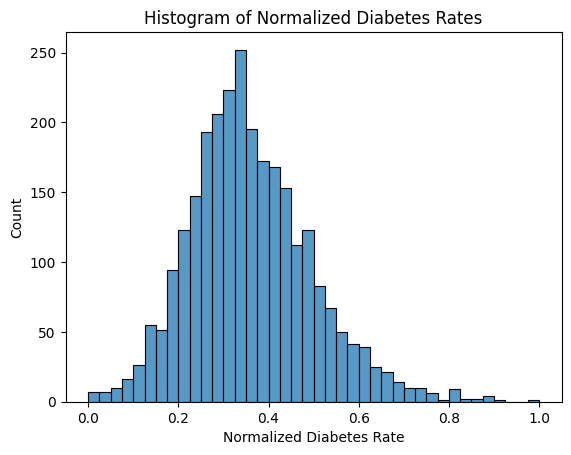

In [ ]:
# Visualization for 'Normalized_Diabetes'
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(merged_data['Normalized_Diabetes'])
plt.title('Histogram of Normalized Diabetes Rates')
plt.xlabel('Normalized Diabetes Rate')
plt.show()


The histogram shows us a picture of how common different diabetes rates are:

1. Most counties have diabetes rates around a similar number, which is where the tallest bar is.
2. There are a few counties with higher diabetes rates, but not too many.
3. The diabetes rates in counties don't change wildly; they stay within a range from low to a little high.
4. We don't see any counties with extremely high or low diabetes rates that stand out from the rest.

**Visualization 2**: Bar Chart of Average Obesity Category by County

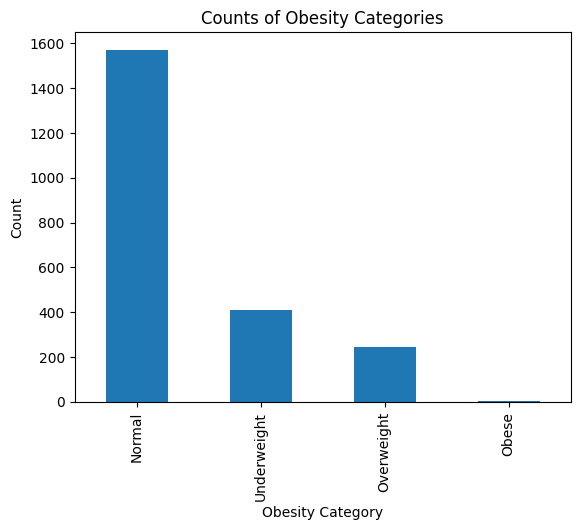

In [ ]:
# a bar chart to see the distribution of Obesity_Category

obesity_category_counts = merged_data['Obesity_Category'].value_counts()
obesity_category_counts.plot(kind='bar')
plt.title('Counts of Obesity Categories')
plt.xlabel('Obesity Category')
plt.ylabel('Count')
plt.show()


1. There are a lot more people in the 'Normal' weight category than in other categories.
2. The 'Underweight' category has the next highest number of people, but it's much less than the 'Normal' category.
3. There are fewer people in the 'Overweight' category.
4. The 'Obese' category has the least number of people compared to the other categories.

**Visualization 3**: Scatter Plot of Uninsured Rate vs. Exercise Rate

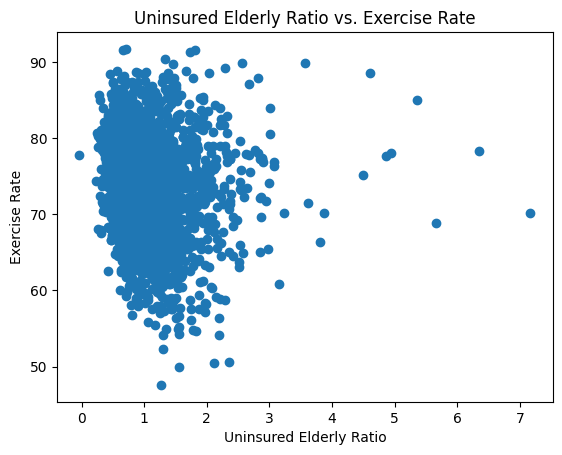

In [ ]:
plt.scatter(merged_data['Uninsured_Elderly_Ratio'], merged_data['Exercise_Rate'])
plt.title('Uninsured Elderly Ratio vs. Exercise Rate')
plt.xlabel('Uninsured Elderly Ratio')
plt.ylabel('Exercise Rate')
plt.show()


1. There's a wide range of exercise rates, mostly between about 50 and 90.
2. There's also a variety of uninsured elderly ratios, but most of the data points seem to cluster between 0 and 3.
3. There isn't a clear pattern showing that the uninsured elderly ratio has a straightforward relationship with the exercise rate. In other words, we can't easily say that just because the uninsured elderly ratio is higher or lower, the exercise rate will be higher or lower too.
4. There are some outliers, especially in the uninsured elderly ratio, where a few points are far away from the main cluster.

**VISUALIZATION 4:**

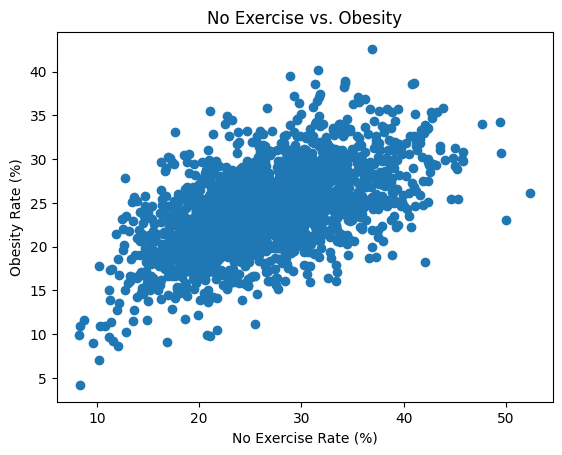

In [ ]:
plt.scatter(merged_data['No_Exercise_x'], merged_data['Obesity_x'])
plt.title('No Exercise vs. Obesity')
plt.xlabel('No Exercise Rate (%)')
plt.ylabel('Obesity Rate (%)')
plt.show()


1. The "No Exercise Rate" ranges from about 5% to nearly 50%.
2. The "Obesity Rate" varies from around 5% to just over 40%.
3. Most of the data points seem to cluster in the middle of the plot, which suggests that many observations have moderate rates of both no exercise and obesity.
4. There isn't a clear, strong pattern that shows an increase in the "No Exercise Rate" is directly associated with an increase in the "Obesity Rate".
5. However, there's a general trend where areas with higher rates of no exercise seem to have higher obesity rates, which could suggest a relationship where less exercise might be associated with higher obesity.1

** VISUALIZATION 5**

Pair Plot

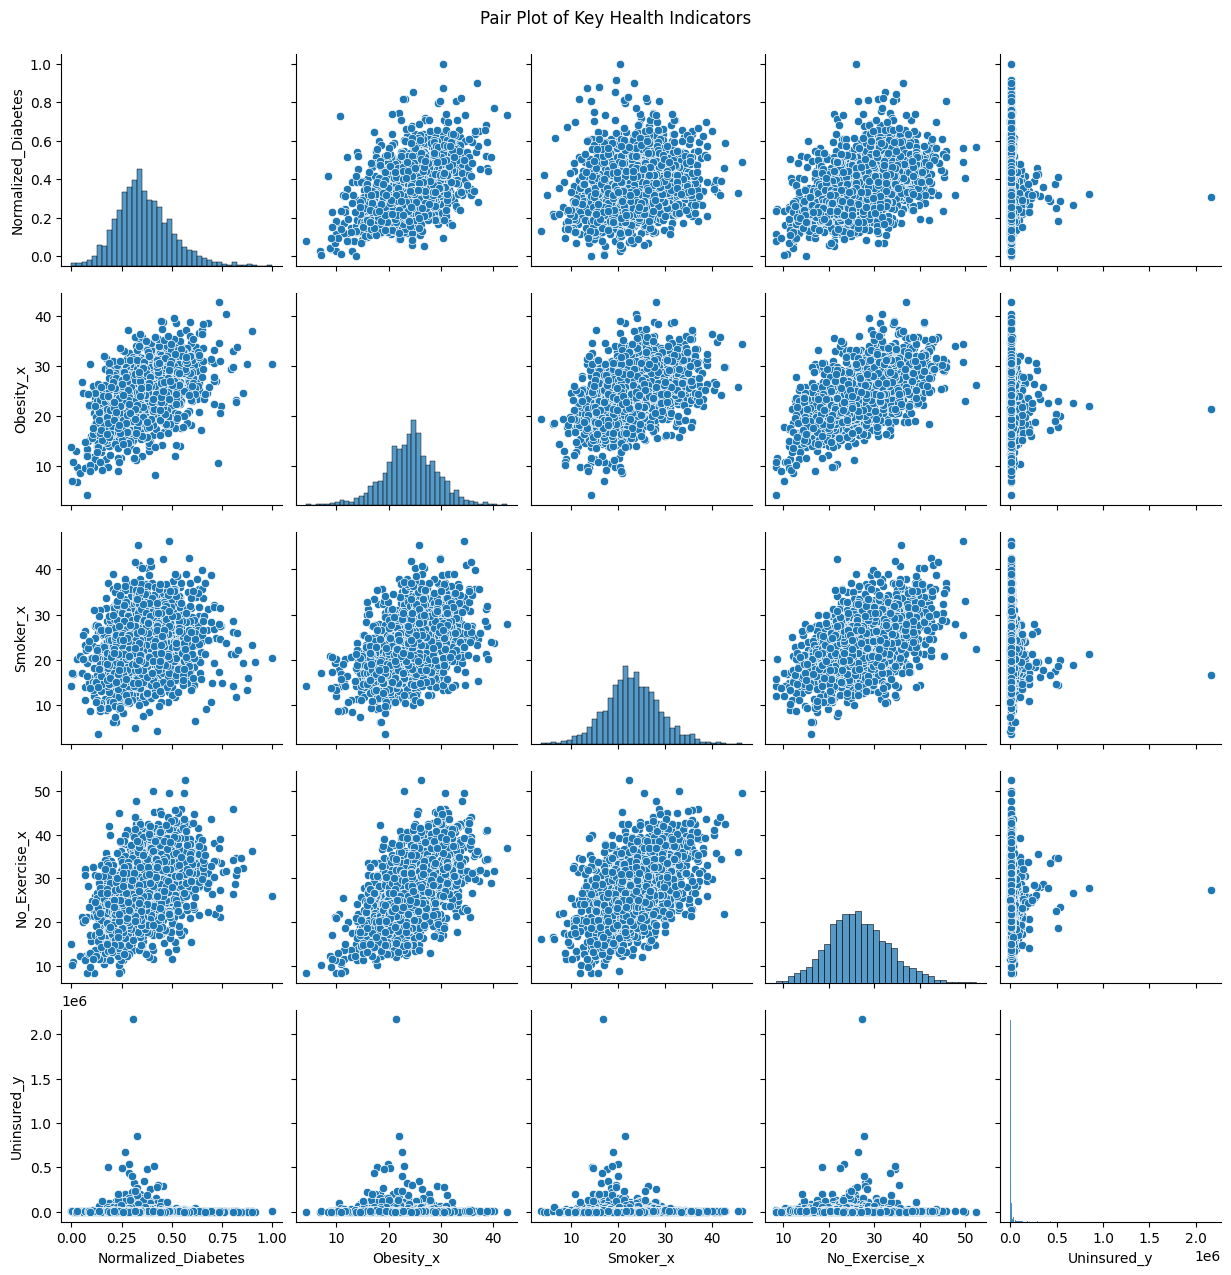

In [ ]:
sns.pairplot(merged_data[['Normalized_Diabetes', 'Obesity_x', 'Smoker_x', 'No_Exercise_x', 'Uninsured_y']])
plt.suptitle('Pair Plot of Key Health Indicators', y=1.02)
plt.show()


The pair plot provides us with charts, each comparing two health factors such, as diabetes, obesity and smoking rates. In the charts where one factor is plotted against another we search for patterns – a clear line or group of points indicates a relationship between those factors. For example if we observe a cluster of points moving upwards and to the right it suggests that as one factor increases so does the other. The charts in the section, where a health factor is plotted against itself show us the distribution of values. A high concentration of points in the middle represents occurrences. By taking a look, at these plots we can gain insight into which health issues often coincide with each other. This information can assist doctors and health programs in determining where to focus their efforts.


**Box Plot for Categorical Comparison**

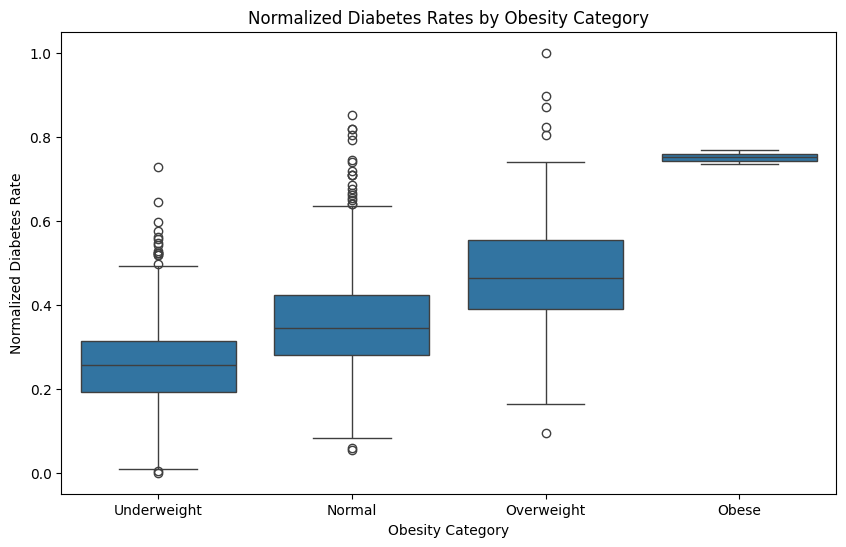

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Obesity_Category', y='Normalized_Diabetes', data=merged_data)
plt.title('Normalized Diabetes Rates by Obesity Category')
plt.xlabel('Obesity Category')
plt.ylabel('Normalized Diabetes Rate')
plt.show()


Each box, in the chart represents a group of people classified by their level of obesity displaying the range of diabetes rates within that group. The line running through the middle of each box indicates the median, which's the value among all the rates.

The 'Underweight' group exhibits a range of diabetes rates compared to the 'Normal' group and its median rate is relatively lower.
The box representing the 'Normal' group appears compact indicating consistency in their diabetes rates. The median falls towards the end of this range.
In contrast for the 'Overweight' group we observe a spread in diabetes rates with a median compared to the 'Normal' group.
Lastly among all categories it is observed that individuals classified as 'Obese' have both the diabetes rate and a majority of their rates falling on higher values.
Additionally you may notice dots above or below some boxes; these represent outliers—rates lower than most others within that particular group.

To put it simply this boxplot graphically illustrates that as individuals progress from being underweight to obese there tends to be an increase in their likelihood of experiencing diabetes. This suggests a correlation, between being overweight or obese and having diabetes rates.

**Bar Chart of Smoking Categories**

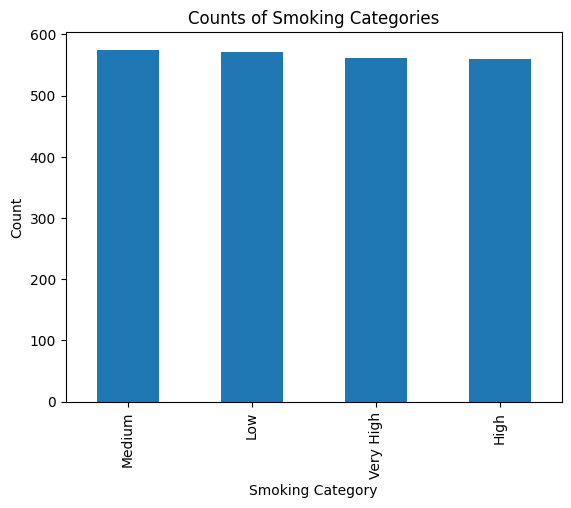

In [ ]:
smoking_counts = merged_data['Smoking_Category'].value_counts()
smoking_counts.plot(kind='bar')
plt.title('Counts of Smoking Categories')
plt.xlabel('Smoking Category')
plt.ylabel('Count')
plt.show()


The bar chart provides an overview of the distribution of people, across smoking categories; Low, Very High and High. Each bar represents the number of individuals in each category. Interestingly the counts for Medium, Low and High categories appear to be quite similar and relatively high. Although the High category has a lower count compared to the others the difference is not significant. This suggests that within this group there is an equal distribution of individuals, across various levels of smoking intensity with only a slightly smaller proportion falling into the Very High smoking category.


# ***Exploratory Analysis***

A correlation matrix heatmap, which is a visual representation of the correlation coefficients between various health indicators

In [ ]:
# Example: Correlation matrix
correlation_matrix = merged_data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix of Health Indicators')
plt.show()


ValueError: could not convert string to float: 'Autauga'

1. The intensity of color reveals the strength of the connection, between two health indicators. When colors are dark it signifies a relationship whereas light colors indicate a relationship.
2. Darker shades of one color represent relationships meaning that as one indicator increases the other also increases. On the hand darker shades of another color depict relationships, where as one indicator increases, the other decreases.
3. Areas with no color or light shading suggest little to no correlation, between those health indicators.

In [ ]:
#Unique Value Counts
merged_data['Smoking_Category'].value_counts()


,count
Smoking_Category,
Medium,575
Low,571
Very High,561
High,560


In [ ]:
#Checking for Null Values
merged_data.isnull().sum()


,0
index_x,0
State_FIPS_Code,0
County_FIPS_Code,0
CHSI_County_Name_x,0
CHSI_State_Name_x,0
...,...
Normalized_Diabetes,422
Obesity_Category,917
Uninsured_Elderly_Ratio,0
Smoking_Category,874


# ***Correlation Analysis***

To understand the relationship between healthcare access and chronic disease prevalence, i want to look at the correlations between relevant variables.

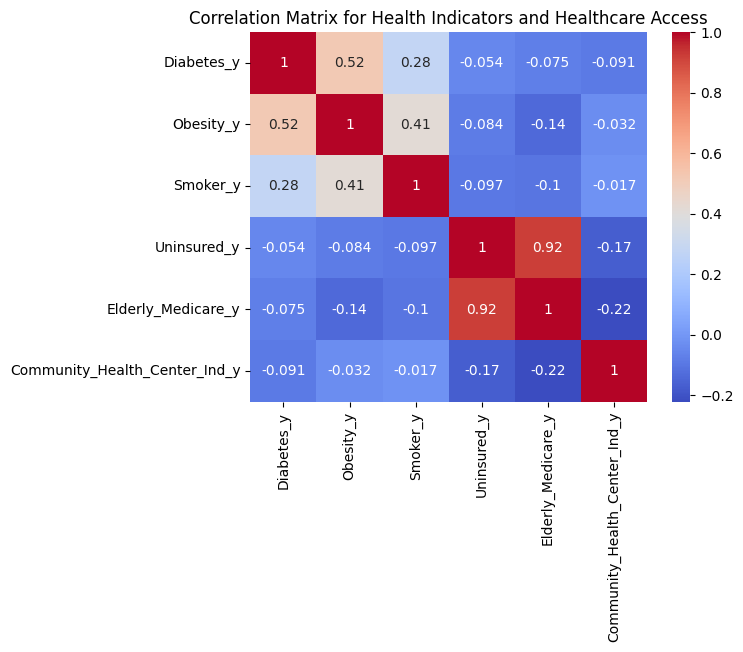

In [ ]:
# Selecting relevant columns for correlation analysis
relevant_columns = ['Diabetes_y', 'Obesity_y', 'Smoker_y', 'Uninsured_y', 'Elderly_Medicare_y', 'Community_Health_Center_Ind_y']
correlation_matrix = merged_data[relevant_columns].corr()

# Visualizing the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Health Indicators and Healthcare Access')
plt.show()


The correlation matrix heatmaps showS the relationships between various health indicators and healthcare access variables

1. There seems to be a connection, between diabetes and obesity (0.52) meaning that as obesity increases the rates of diabetes also tend to increase.
In terms of smoking there is a correlation with both diabetes (0.28) and obesity (0.41) indicating a less strong but still positive relationship.
2. It appears that the uninsured rate has a positive correlation with the variable labeled 'Elderly_Medicare_y' (0.92). This suggests that areas with rates also have more elderly people with Medicare or could be an indication of the elderly population itself.
3. Most other correlations involving the 'Uninsured_y' and 'Community_Health_Center_Ind_y' variables are relatively weak indicating no linear relationship, with the rates of diabetes, obesity or smoking.

# **CONCLUSION :**

The exploration of health indicators, in the counties of Missouri has provided insights. We have noticed a relationship between obesity and diabetes rates, which suggests a possible connection between managing body weight and the prevalence of chronic conditions. Although the correlation between smoking rates and obesity/diabetes is not as strong it still shows an association emphasizing the role of lifestyle factors in managing diseases.


 Additionally there is a correlation between rates and Medicare usage among older adults, which may indicate underlying socioeconomic factors affecting access to healthcare services.

  It's important to acknowledge the limitations of these studies, such as their inability to establish causation from correlation. However these findings highlight the significance of healthcare approaches that consider both socio behavioral aspects.
  
  
  This analysis sets the stage, for targeted interventions based on data driven strategies to reduce health disparities and foster healthier communities throughout Missouri.
